# Computational Social Science Project #3 

**Enter your Name:** Jaclyn Schess

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

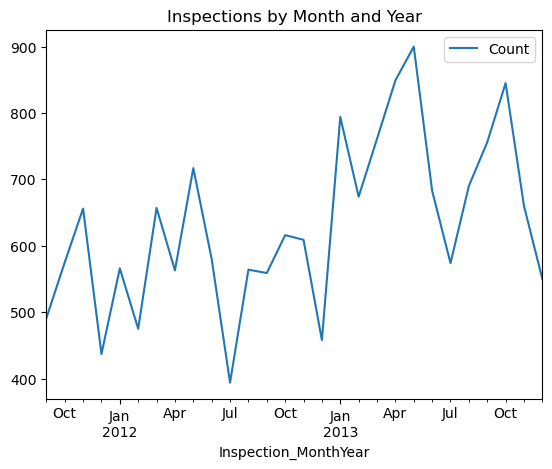

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

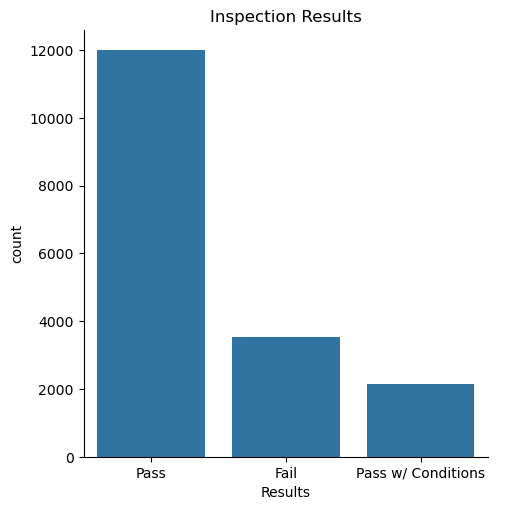

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

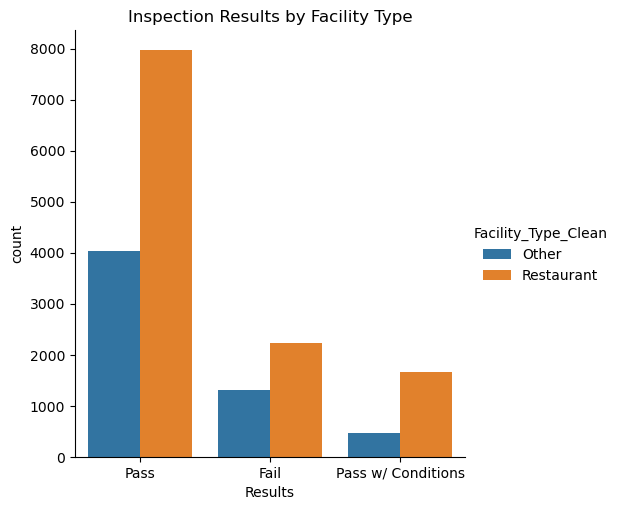

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [13]:
# import libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression


### Model 1: Random Forests

Random forests are an ensemble learning method combining multiple decision trees trained on different subsets of the data. This improves on decision trees by increasing variance and decreasing the risk of overfitting. They are parametric and dont impose any assumptions on the shape of the relationship. Random forests are helpful for capturing non-linear relationships with complex interactions. The downside of this approach is that it is less interpretable. It is helpful in this context given that this relationship is potentially non-linear and complex. 

In [14]:
# initialize a random forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

#set params
rf_param_grid = { 
	'n_estimators': [20, 50, 100, 200], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 

#Grid search and fit
rf_grid=GridSearchCV(rf_classifier,
                     rf_param_grid,
                     cv=3)

rf_grid.fit(X,y)


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]})

In [15]:
#Output best params and get best estimator

print("Best parameters found: ", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_
        

Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


###  Model 2: AdaBoost

Adaptive boosting is an ensemble method that sequentially trains trees and the final prediction weights the models that performed best.
It can be beneficial by creating highly accurate models, but can be too sensitive to noise and risk overfitting. The potential upside of
accurate prediction is attractive in this setting. 

In [16]:

warnings.filterwarnings("ignore", category=UserWarning)
# initialize an adaptive boosting classifer 

ada_classifier = AdaBoostClassifier(random_state=10)

#set params

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}

#Grid search and fit

ada_grid=GridSearchCV(ada_classifier,
                     ada_param_grid,
                     cv=3)

ada_grid.fit(X,y)

#Output best params and get best estimator

print("Best parameters found: ", ada_grid.best_params_)
best_ada = ada_grid.best_estimator_



/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 50}


### Model 3: Logistic Regression

Logistic regression assumes a log-linear relationship, independent errors and no multicollinearity. Logistic regression is helpful because it is easy to interpret, but on the other hand is best for linear relationships. It is helpful in this case because it is easily interpretable and this can be beneficial for policy application environments. 

In [17]:
#initialize log regression classifier
log_reg = LogisticRegression(random_state = 10)

#set params
log_param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

#Grid search and fit

log_grid=GridSearchCV(log_reg,
                     log_param_grid,
                     cv=3)

log_grid.fit(X,y)


#Output best params and get best estimator

print("Best parameters found: ", log_grid.best_params_)
best_log = log_grid.best_estimator_



/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/linear_model/_l

Best parameters found:  {'C': 545.5594781168514, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

I would want to prioritize recall as this is a situation where false negatives are more costly than false positives. False negatives mean unsafe establishments are not caught, where false positives mean inefficient use of funds. 


In [20]:
from sklearn.model_selection import cross_validate

for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost']):
    scores = cross_validate(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring=['accuracy',
                                           'precision',
                                           'recall',
                                           'f1'], 
                                  cv=5)
    
    print(f"Results for {label}:")
    print(f"  Accuracy: {scores['test_accuracy'].mean():.4f}")
    print(f"  Precision: {scores['test_precision'].mean():.4f}")
    print(f"  Recall: {scores['test_recall'].mean():.4f}")
    print(f"  F1 Score: {scores['test_f1'].mean():.4f}\n")

Results for Logistic Regression:
  Accuracy: 0.9184
  Precision: 0.7705
  Recall: 0.8530
  F1 Score: 0.8079

Results for Random Forest:
  Accuracy: 0.9237
  Precision: 0.7710
  Recall: 0.8860
  F1 Score: 0.8239



/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

Results for Ada Boost:
  Accuracy: 0.9160
  Precision: 0.7782
  Recall: 0.8186
  F1 Score: 0.7967



## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

The most important feature across all models is the previous finding of a serious violation. 

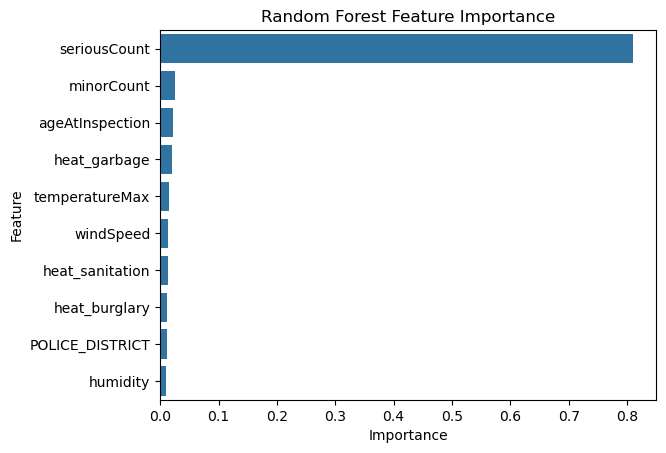

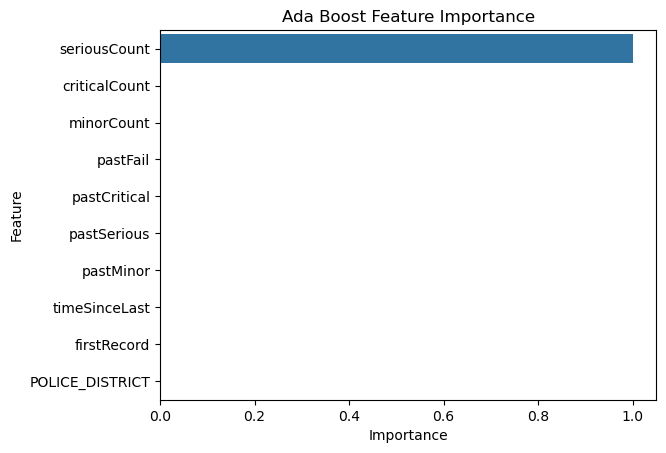

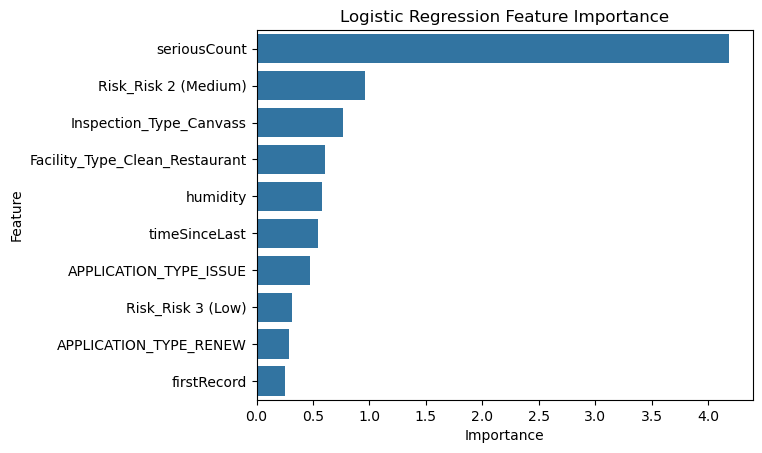

In [22]:
# import library
import seaborn as sns

#Random Forest feature importance
# create feature importance dataframe
feat_importances_rf = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(best_rf.feature_importances_))], axis = 1)
feat_importances_rf.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances_rf.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("Random Forest Feature Importance")
plt.show()


#Adaptive Boosting feature importance
# create feature importance dataframe
feat_importances_ada = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(best_ada.feature_importances_))], axis = 1)
feat_importances_ada.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances_ada.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("Ada Boost Feature Importance")
plt.show()

#Logistic regression feature importance
feat_importances_log = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(best_log.coef_[0])  # Coefficients as importance
})

# plot 
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_importances_log.nlargest(10, "Importance")
)
plt.title("Logistic Regression Feature Importance")
plt.show()


### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [26]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


# specify voting classifier
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', best_log),
                                     ('rf', best_rf),
                                     ('ada', best_ada)],
                        # specify voting
                        voting = 'soft')

ens_scores =  cross_validate(voting_classifier, 
                                  X_train, 
                                  y_train.ravel(),
                                  scoring=['accuracy',
                                           'precision',
                                           'recall',
                                           'f1'], 
                                  cv=5)

/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

In [33]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

# Using predict_proba() to predict probabilities of fail
voting_classifier.fit(X_train, y_train.ravel())
proba = voting_classifier.predict_proba(X_test)

#Sort in descending order (highest to lowest probability of detecting fail)
proba_1 =  proba[:, 1]
sort_index = np.argsort(proba_1)[::-1]
sorted_proba = proba[sort_index]

sorted_proba

/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([[0.10345665, 0.89654335],
       [0.103575  , 0.896425  ],
       [0.10379133, 0.89620867],
       ...,
       [0.98844878, 0.01155122],
       [0.98847227, 0.01152773],
       [0.98852019, 0.01147981]])

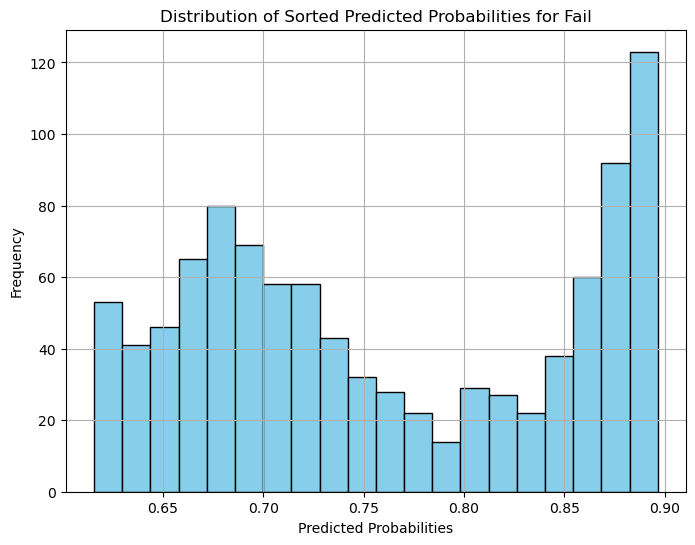

In [34]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
num_observations = 1000
proba_fail_1000 = sorted_proba[:num_observations, 1]  # Probabilities for Fail

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(proba_fail_1000, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Fail')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

#get total n
total_n = chicago_inspections_2011_to_2013.shape[0]

#set number of observations to randomly audit
audit_n = 1000

#randomly select observations
random_subset = chicago_inspections_2011_to_2013.sample(n=audit_n, replace=False)


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [40]:
# data processing
# -----------

chicago_inspections_2014 = chicago_inspections_2014[['Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound']]

chicago_inspections_2014 = chicago_inspections_2014.dropna()

# process features
X_test2014 = chicago_inspections_2014.drop(columns=['Results'])
X_test2014 = pd.get_dummies(X_test2014)

# process target 
y_test2014 = chicago_inspections_2014['Results']

y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
y_test2014 = lb_style.fit_transform(y_test2014)
y_test2014 = np.where(y_test2014 == 1, 0 ,1)



In [41]:
# predict and compare 
# -----------
vote_pred_14 = voting_classifier.predict(X_test2014)

In [43]:
# evaluate
# -----------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test2014, vote_pred_14))
print("Precision:", precision_score(y_test2014, vote_pred_14))
print("Recall:", recall_score(y_test2014, vote_pred_14))
print("F1:", f1_score(y_test2014, vote_pred_14))

Accuracy: 0.8994413407821229
Precision: 0.6847619047619048
Recall: 0.9170918367346939
F1: 0.7840785169029444


# 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy captures how many predictions are correct overall. Still, in many social science and policy relevant applications, we may have more nuanced priorites. For example, we may be particularly worried about false negatives in medical or public health contexts. While a false positive can be distressing, medical diagnoses usually involve multiple layers and this incorrect classification may still be caught. On the other hand, if someone receives a false negative classification, they may not have more contact with the healthcare system while they do in fact have a health condition in need of further testing and treatment. This situation may mean it would be important to prioritize recall in addition to accuracy. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Policymakers could address this interplay by implementing an approach that uses both random and targeted audits. Keeping some audits random ensures that these audits cannot be gamed by establishments, while having some be targeted allows resources to be spent more efficiently than a fully random system. 